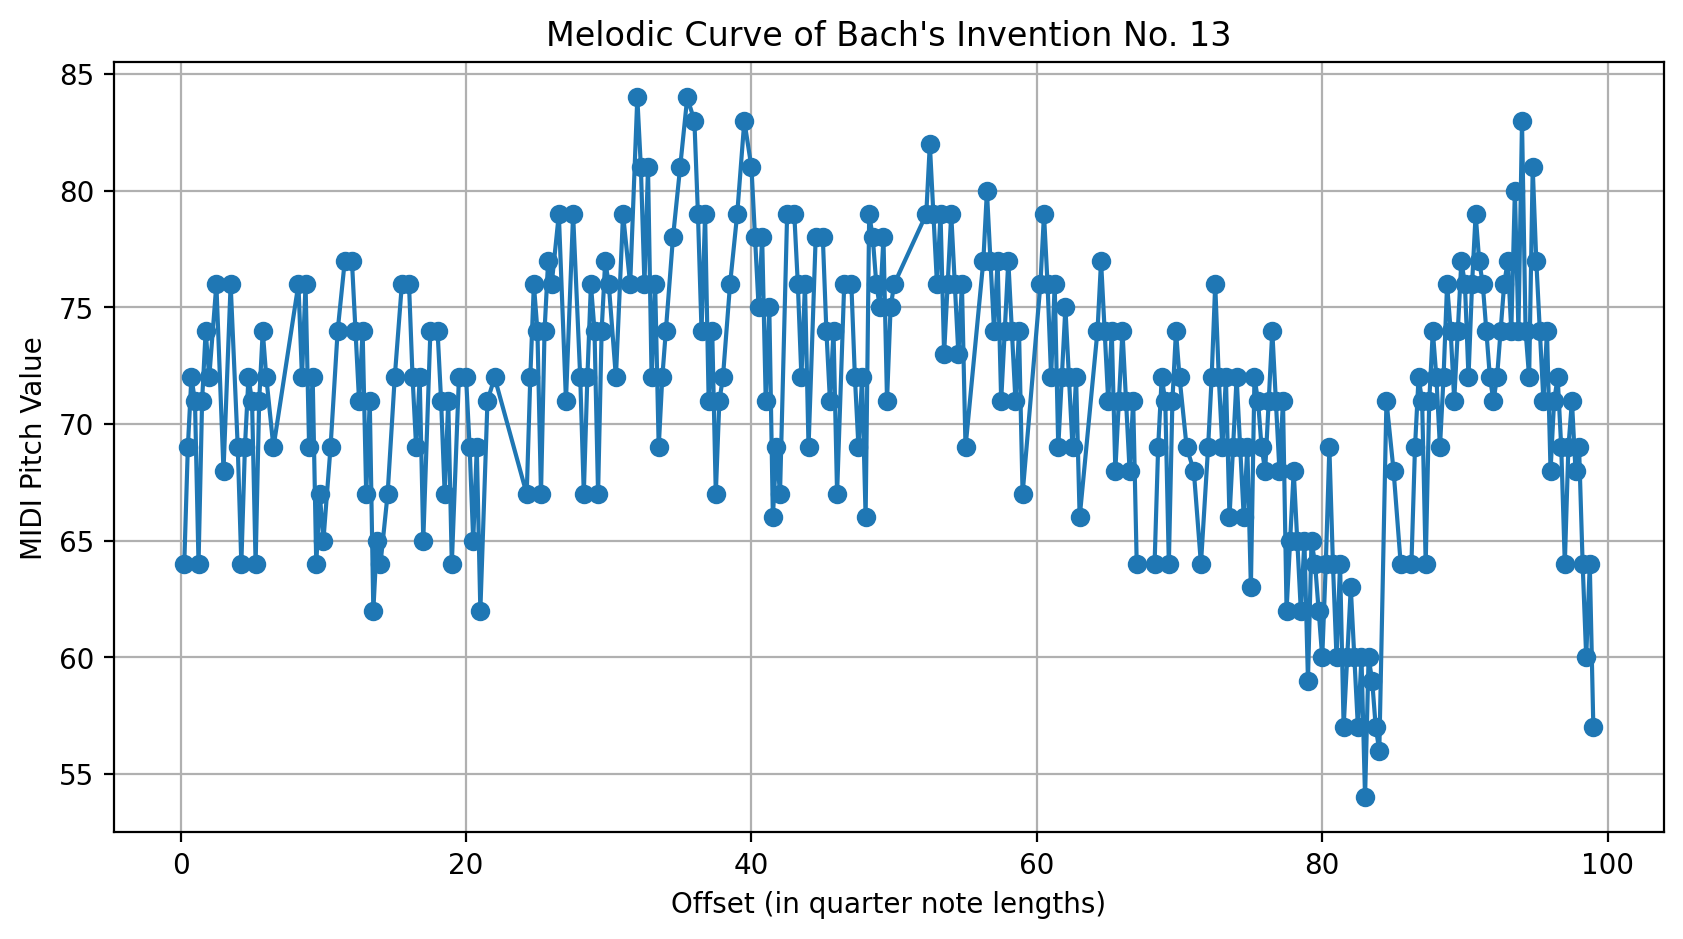

In [10]:
from music21 import converter
import matplotlib.pyplot as plt
invention=converter.parse('inven13.krn')
melody_part = invention.parts[0]
notes = melody_part.flat.notes
pitch_data = [(n.offset, n.pitch.midi) for n in notes]
# Unzip the data into x (offsets) and y (pitches) components
x, y = zip(*pitch_data)

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o')
plt.title("Melodic Curve of Bach's Invention No. 13")
plt.xlabel("Offset (in quarter note lengths)")
plt.ylabel("MIDI Pitch Value")
plt.grid(True)
plt.show()

C:\Users\jackparsons210\AppData\Local\Temp\ipykernel_3148\3217253011.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, 'o-', marker='o', markersize=3, linewidth=1)  # Line with dots


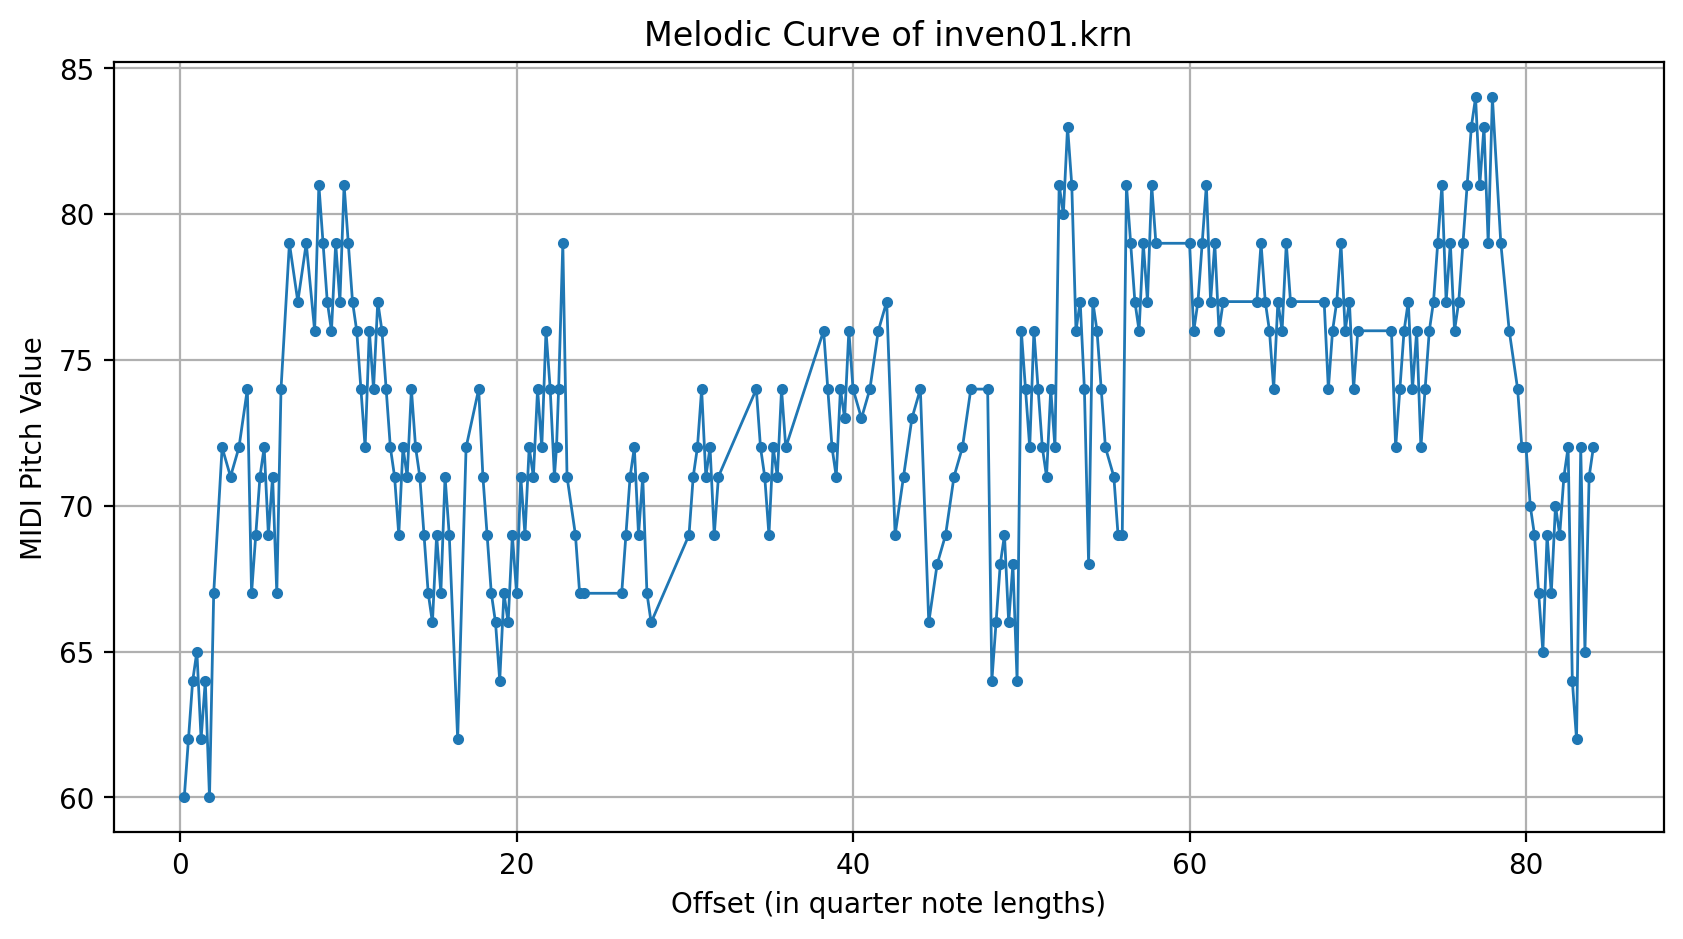

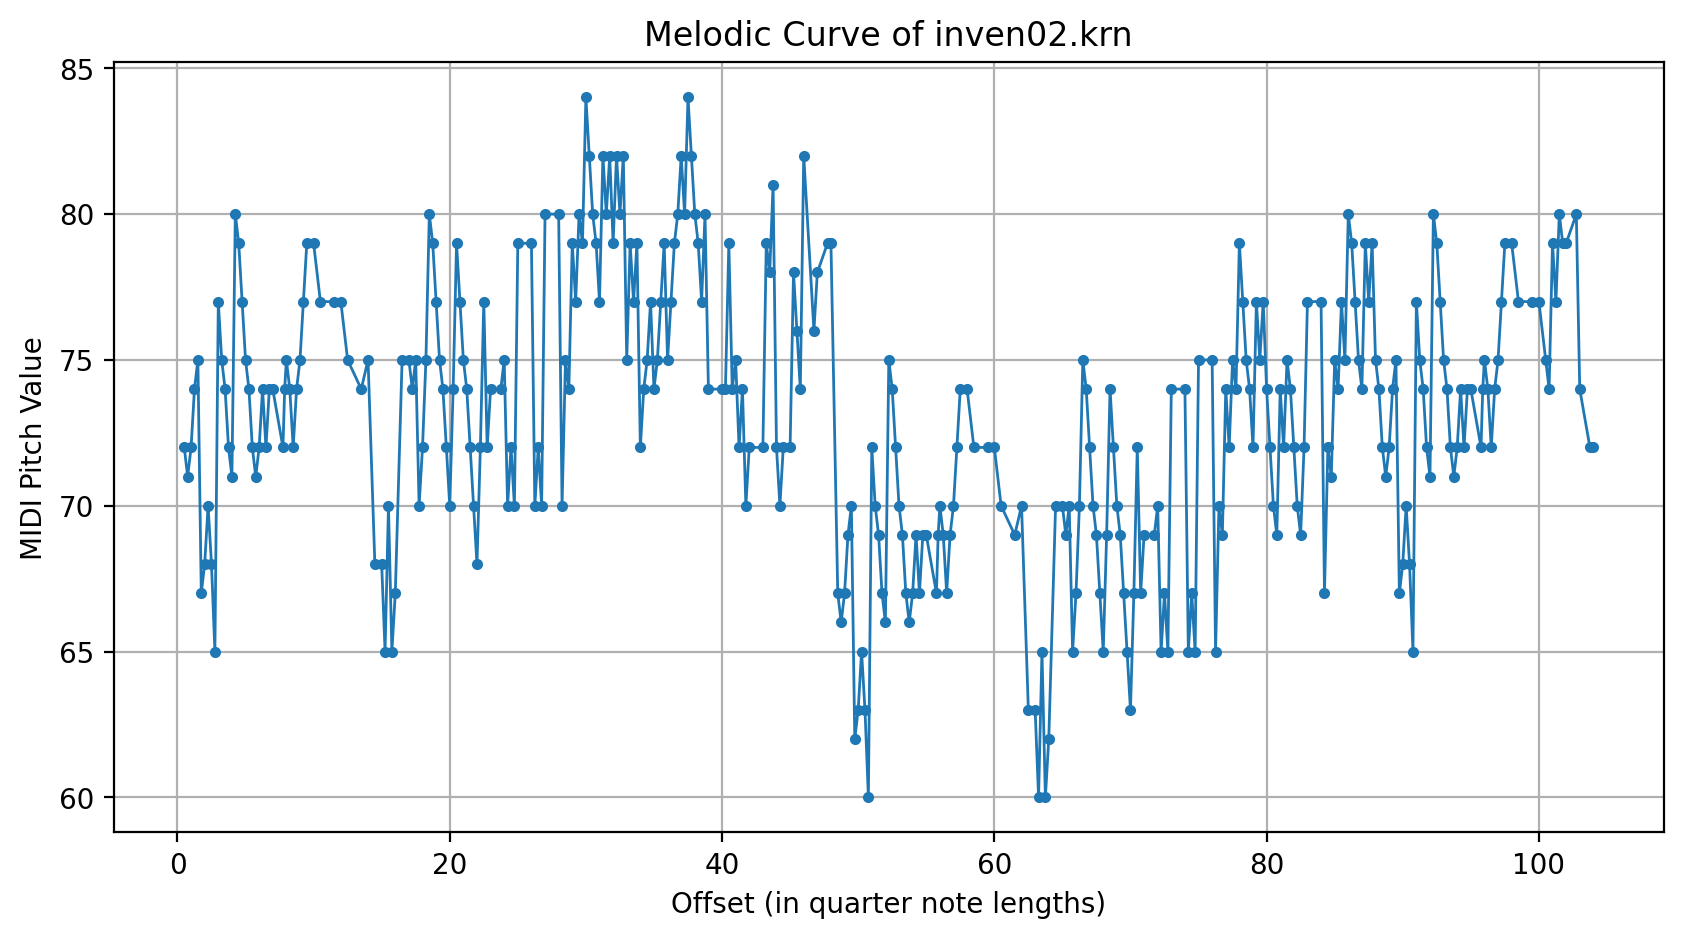

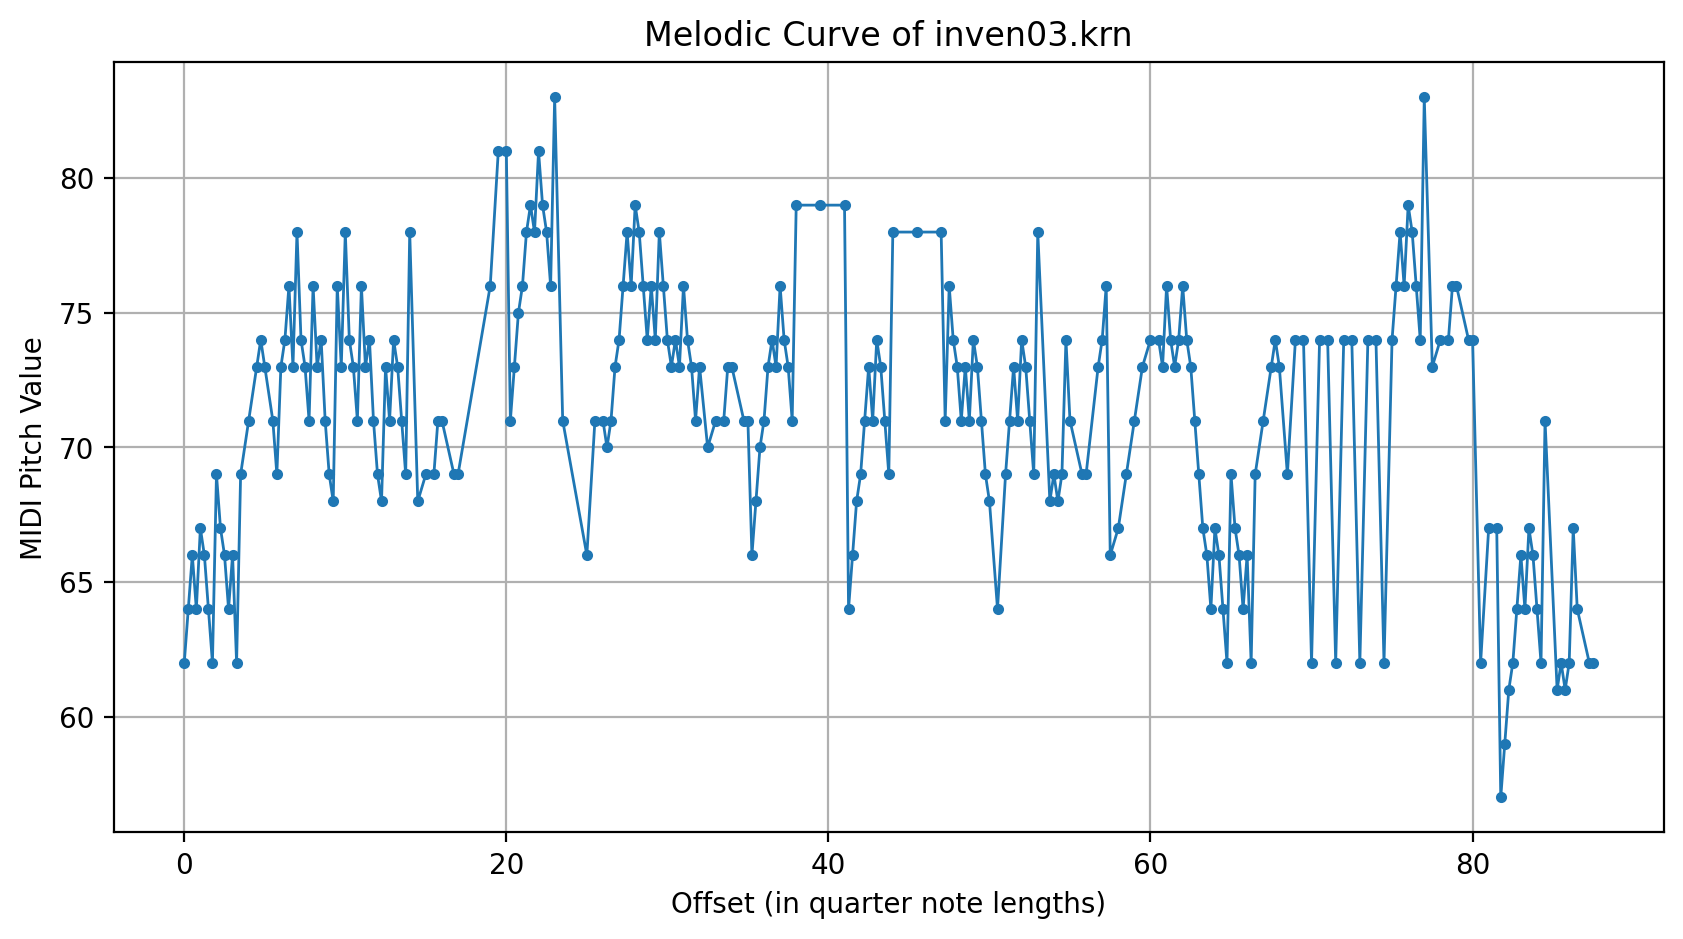

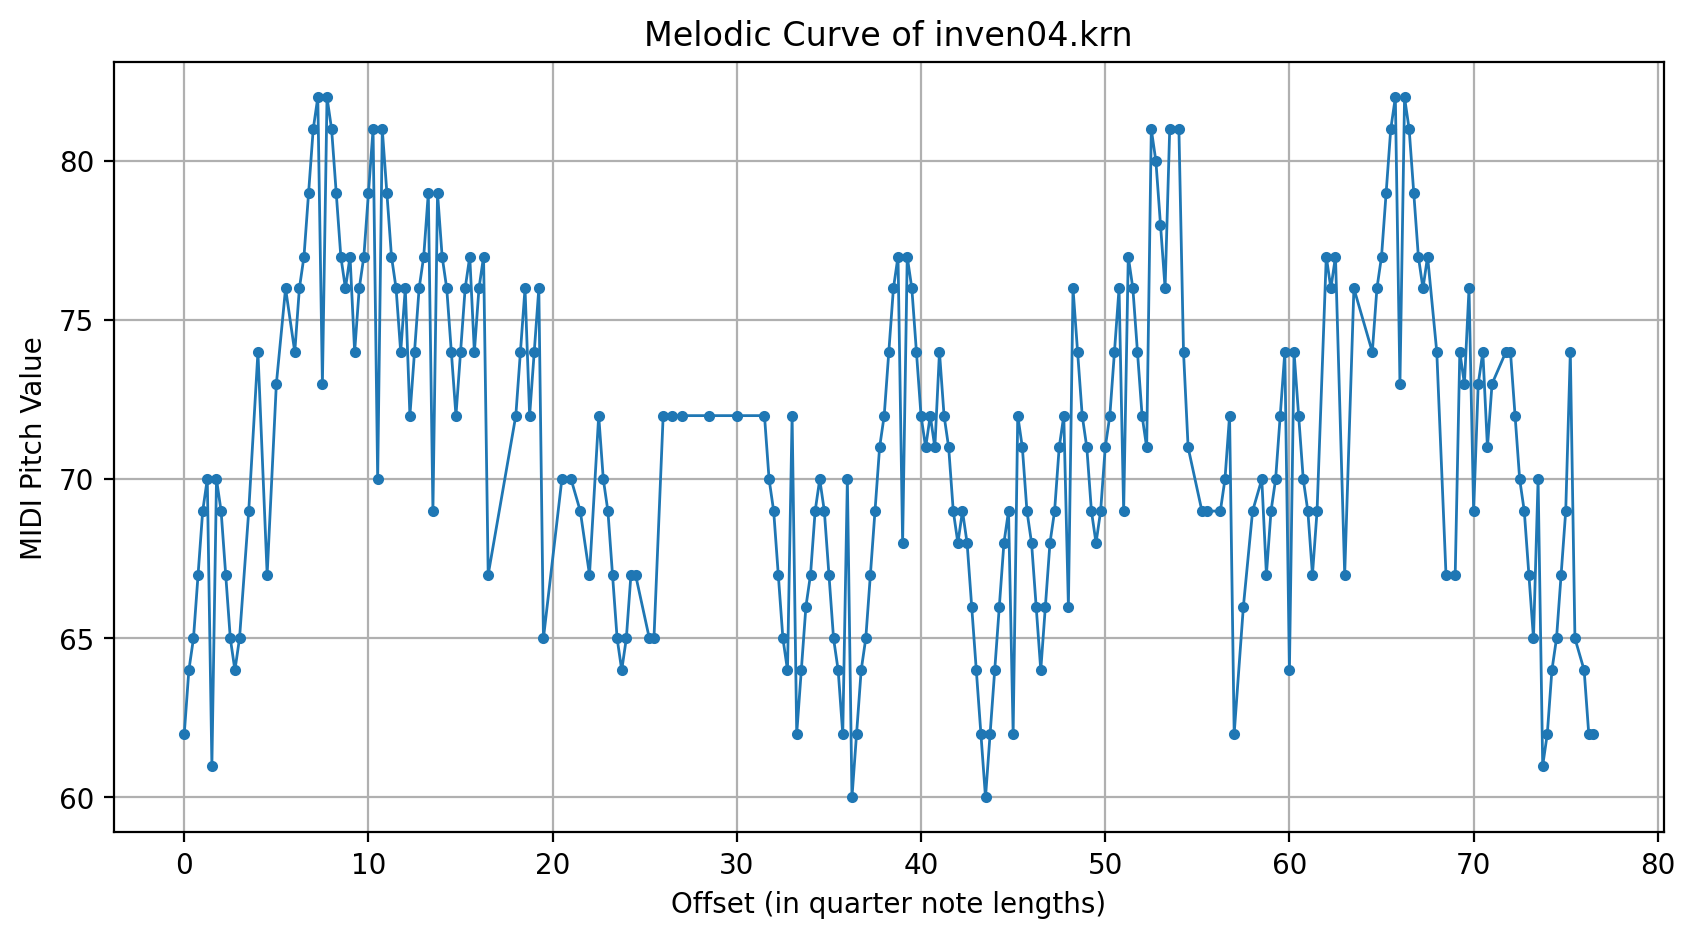

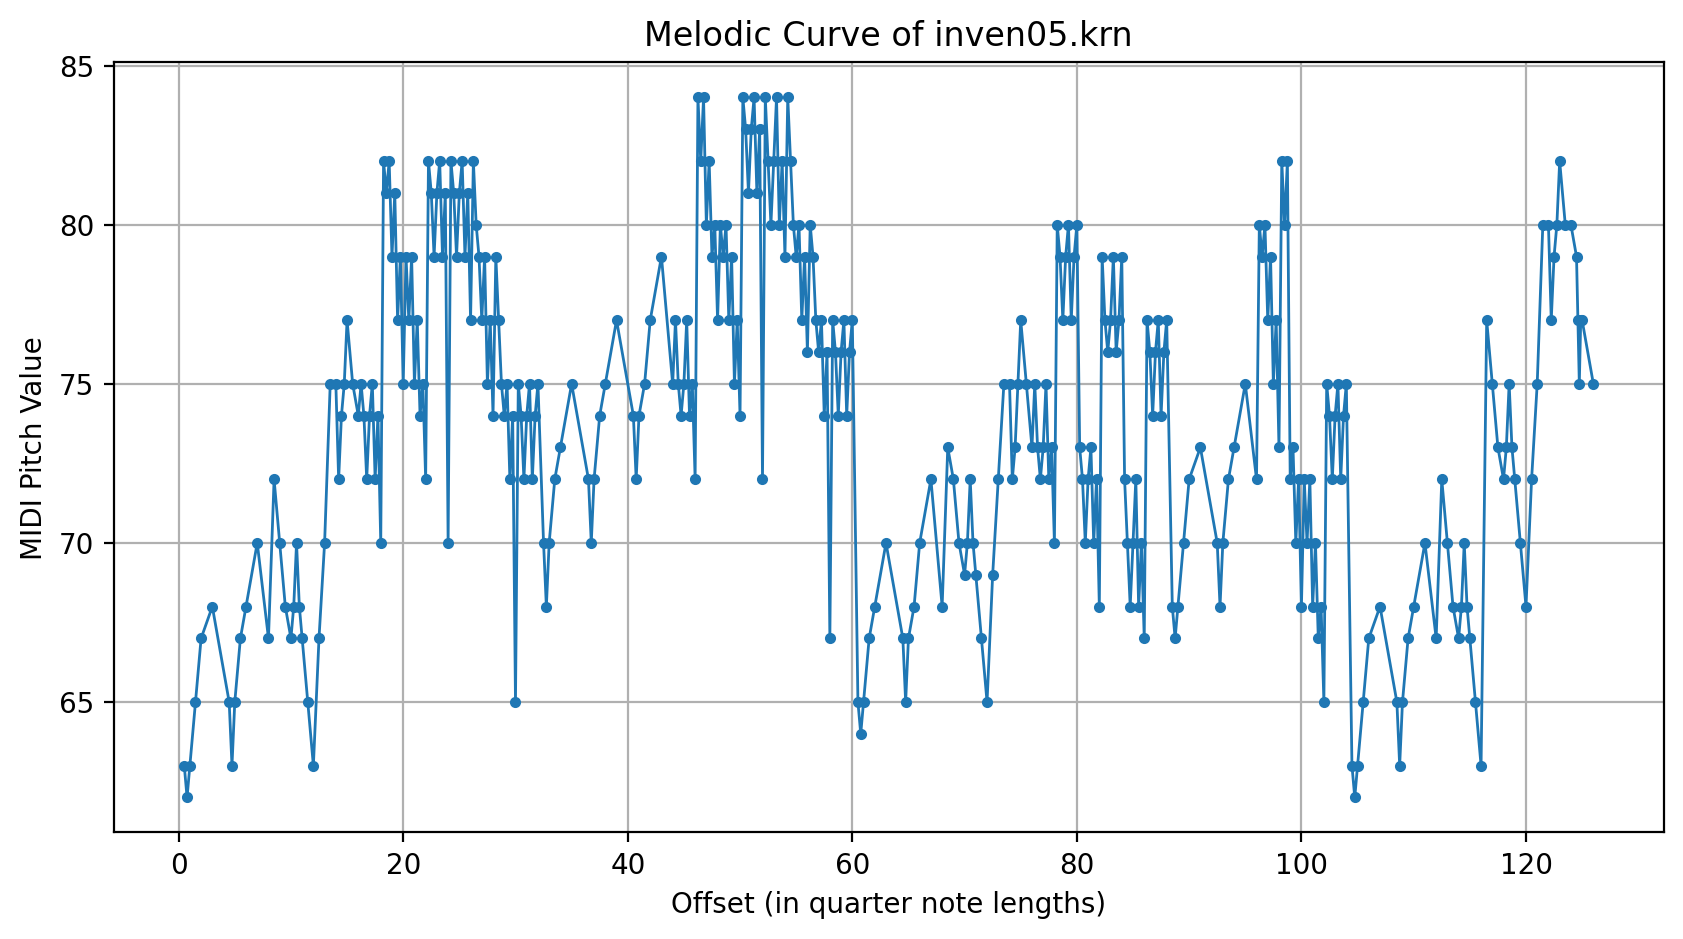

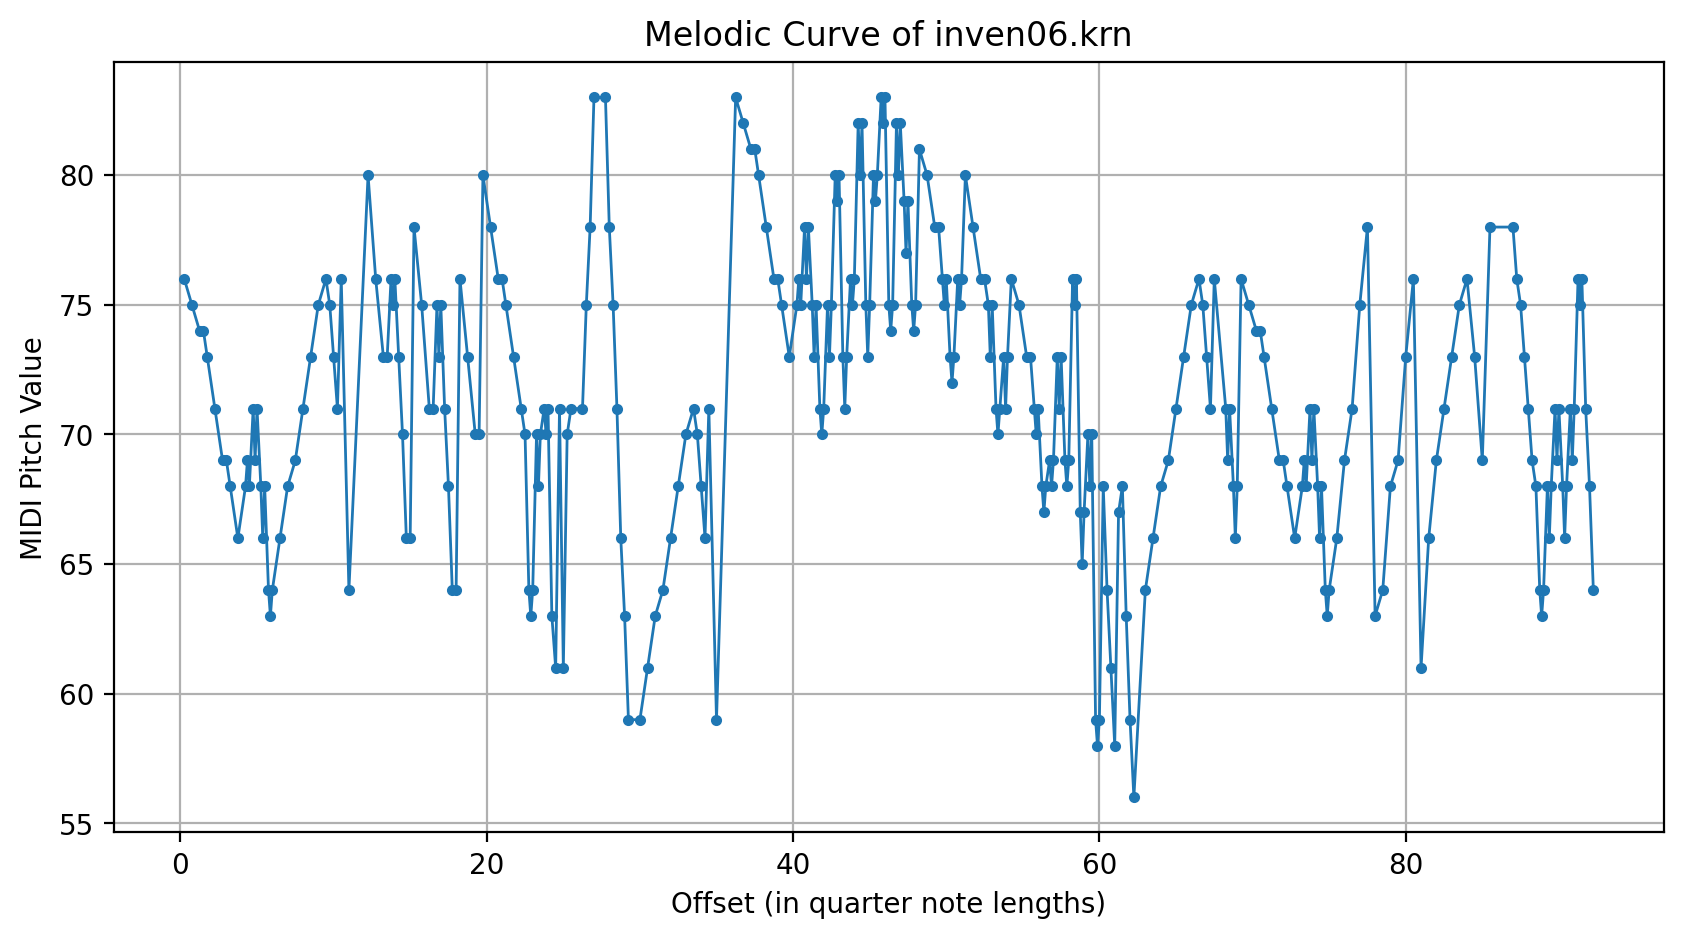

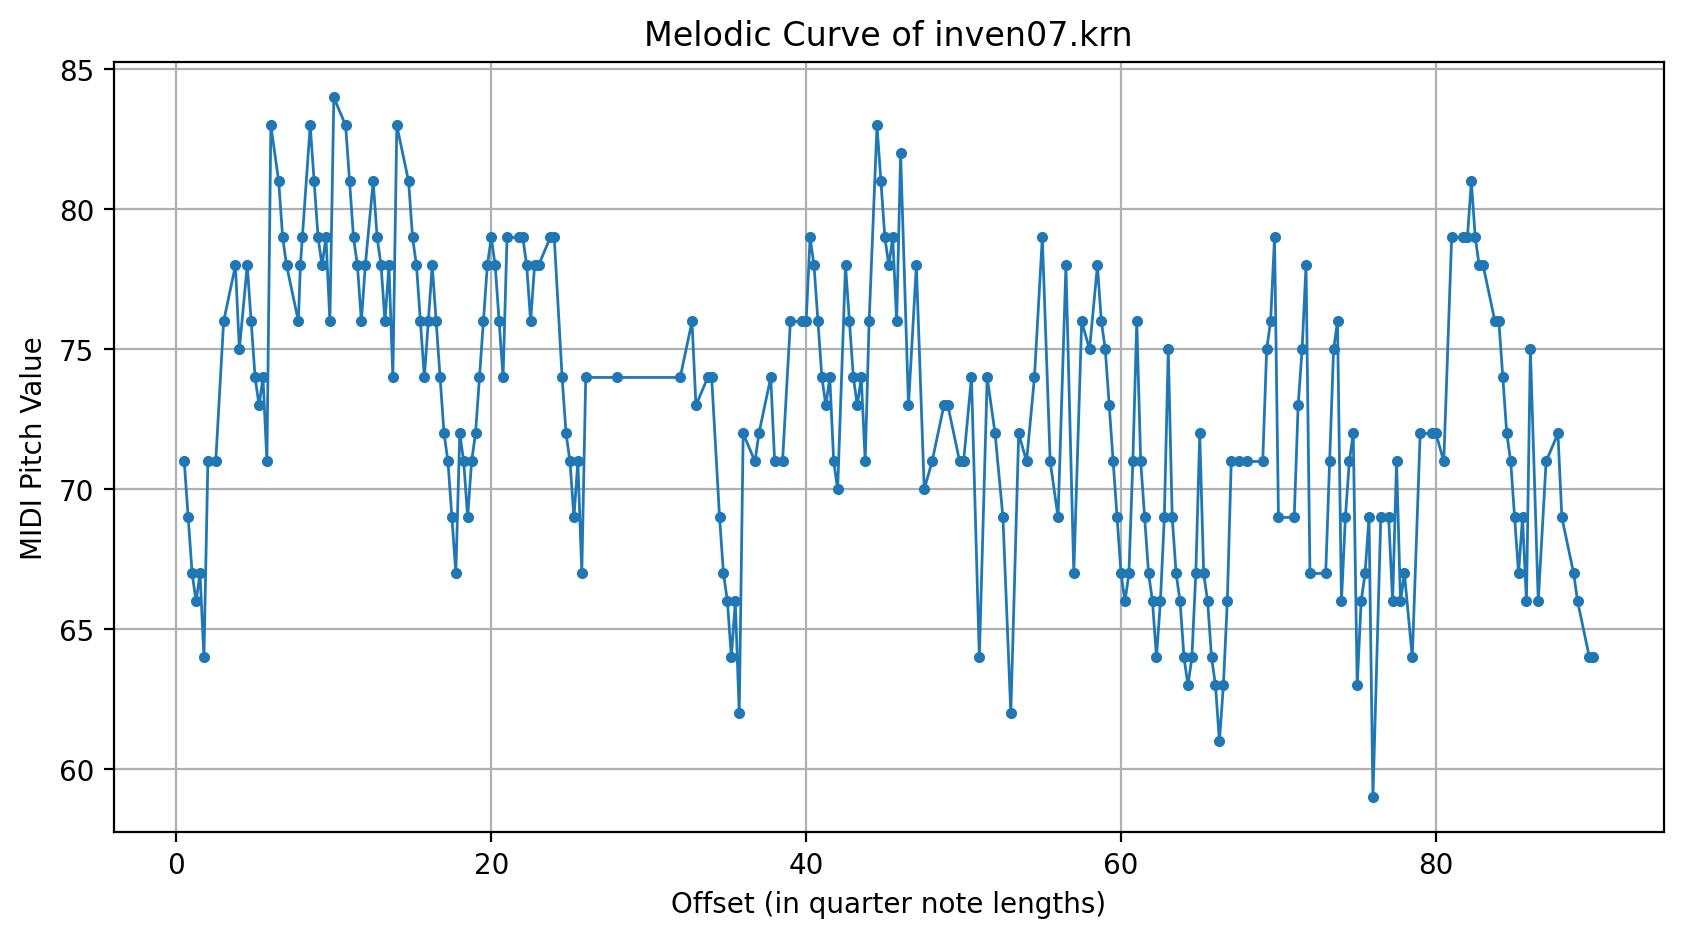

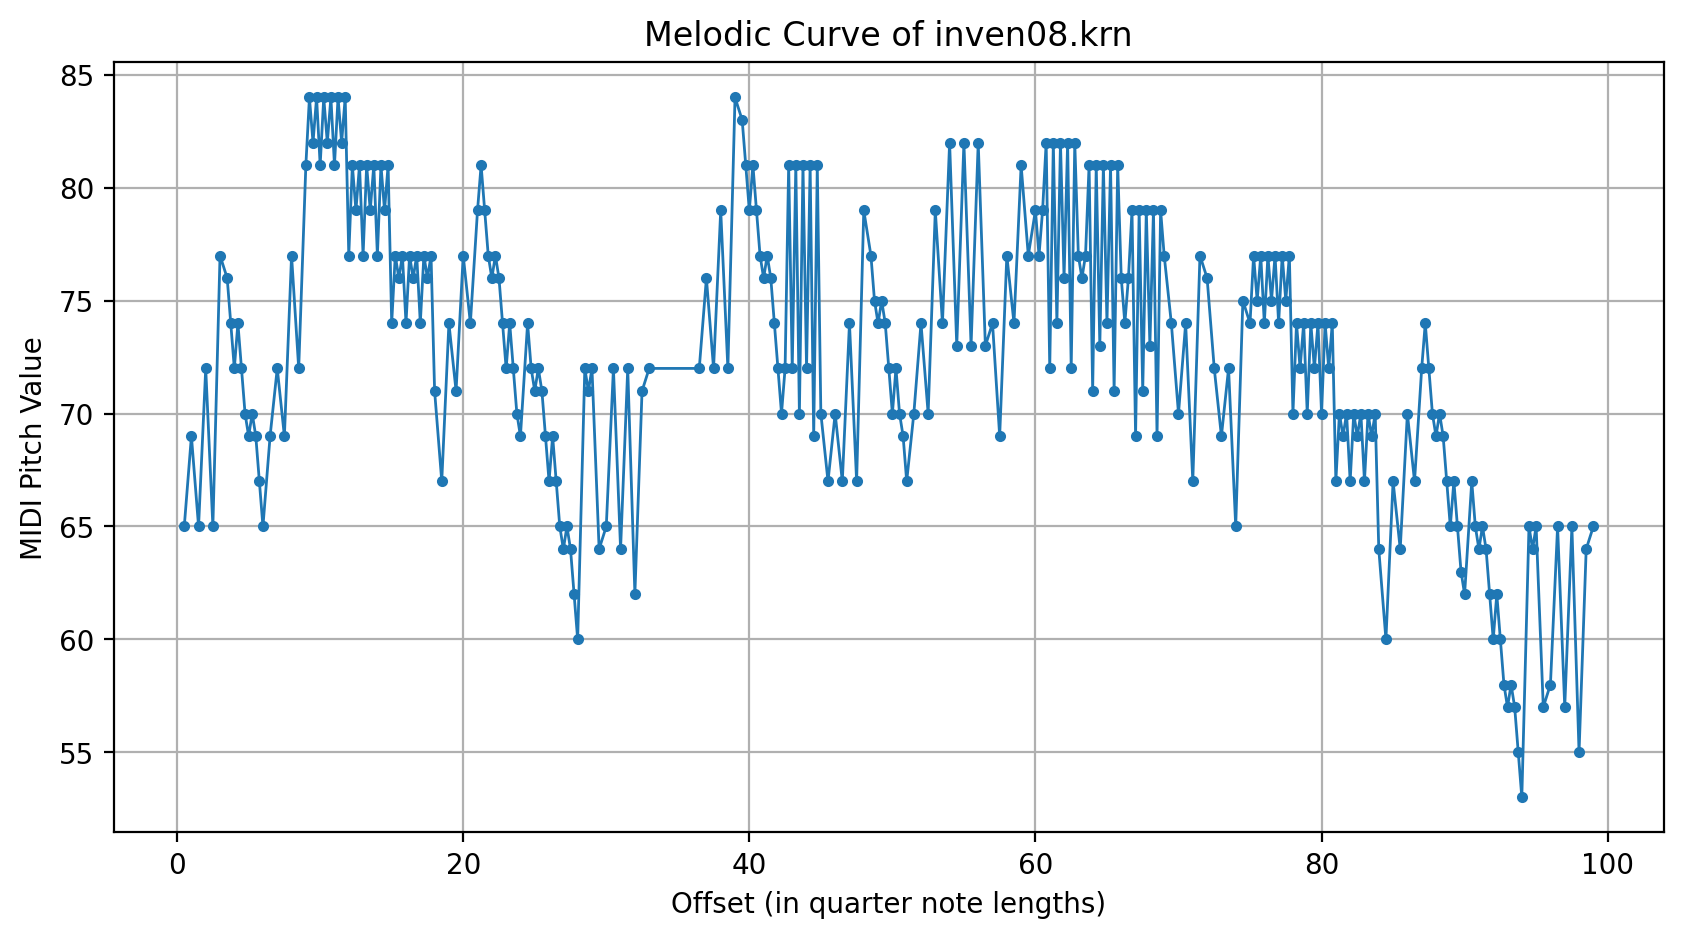

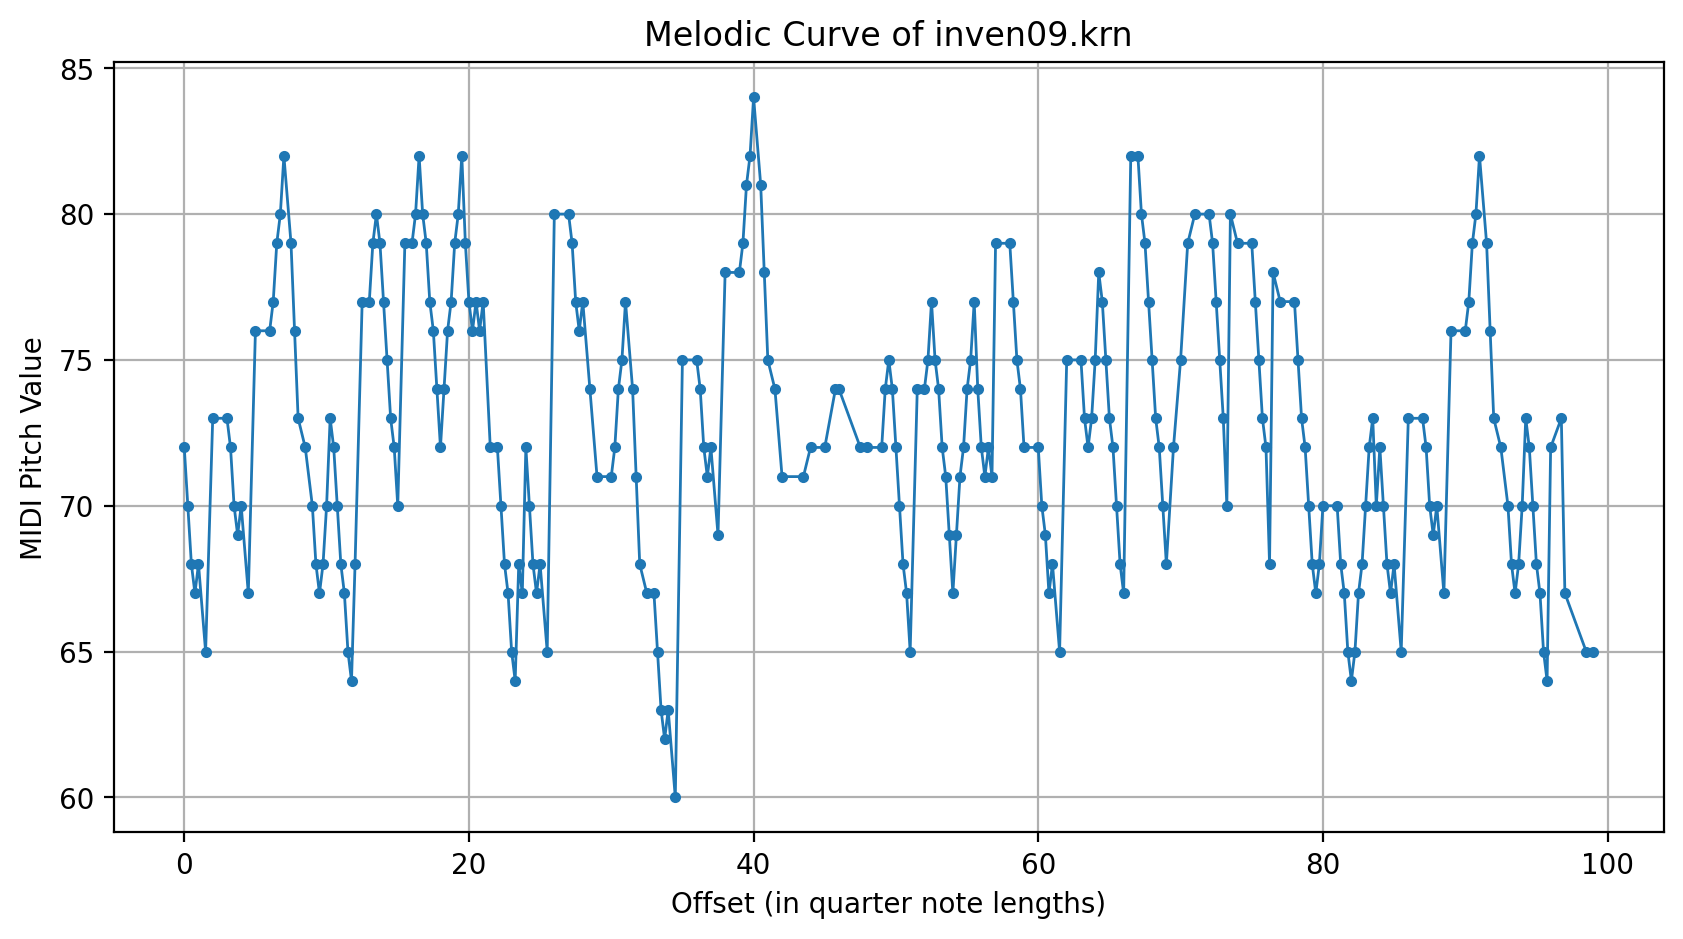

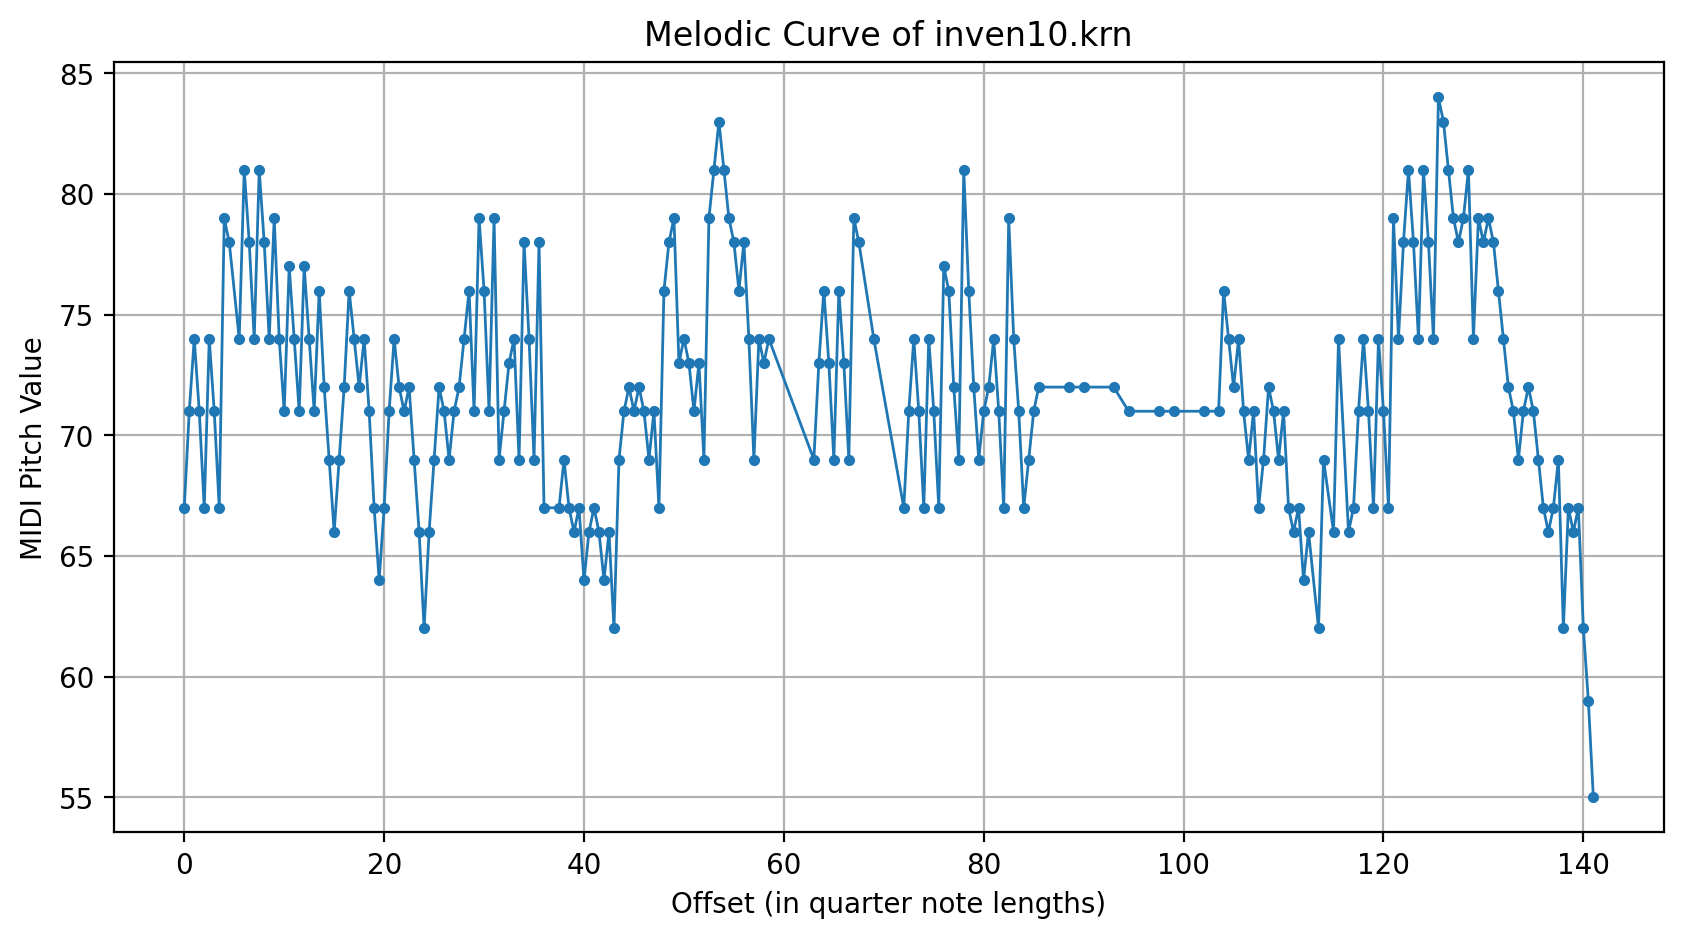

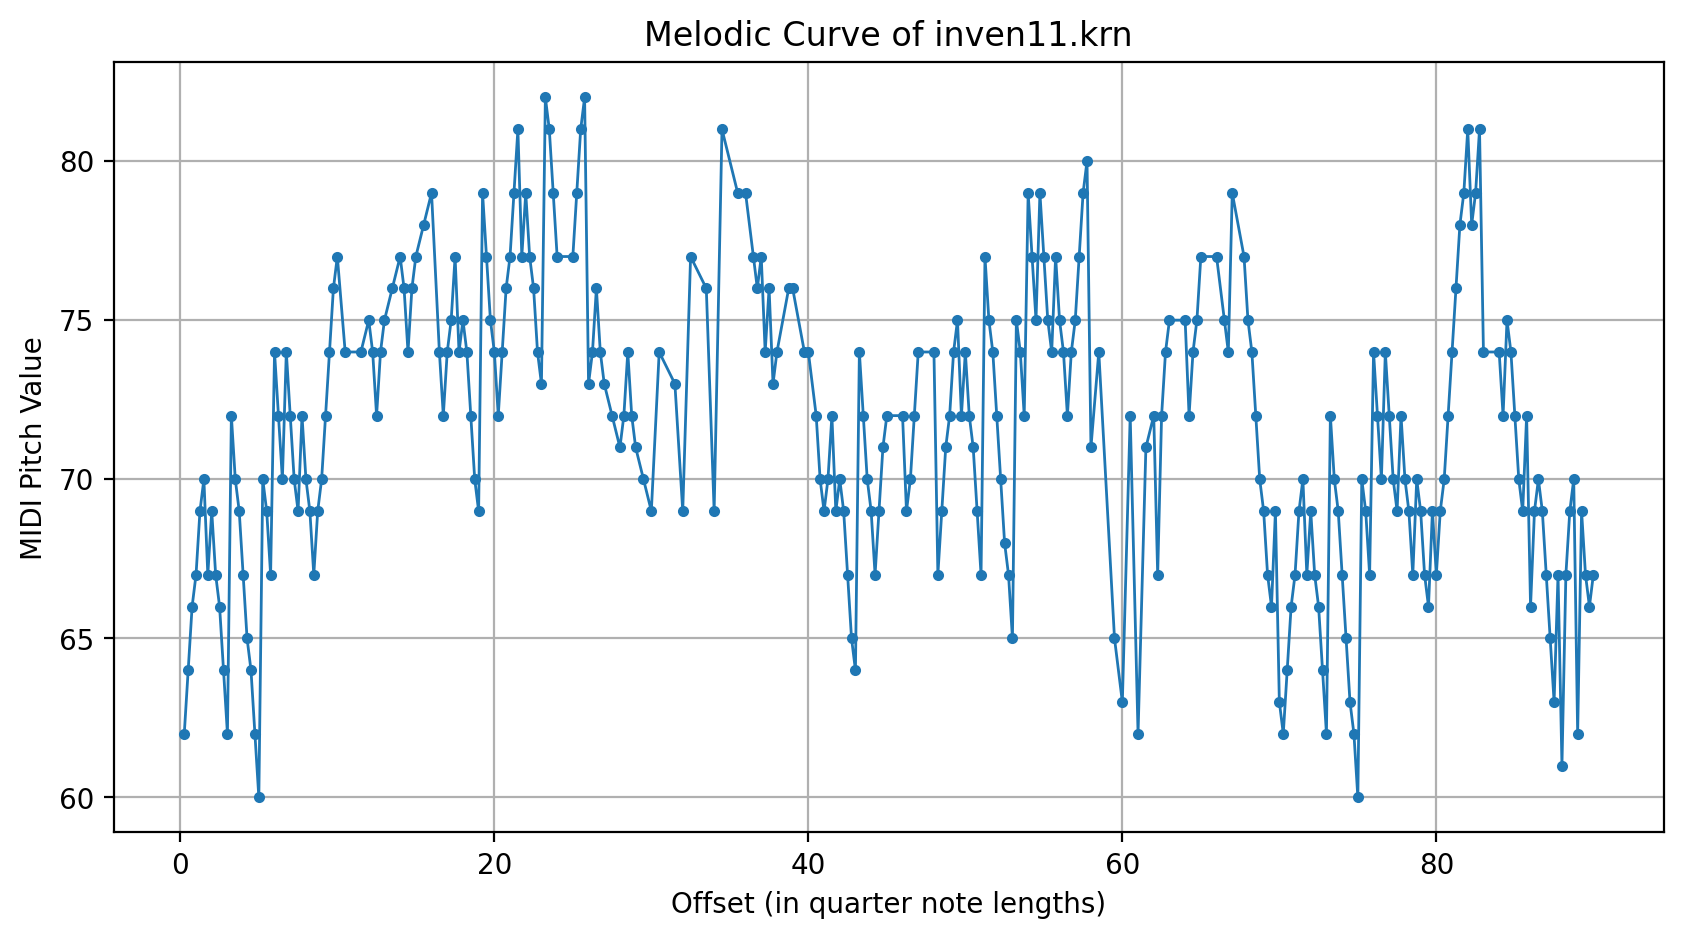

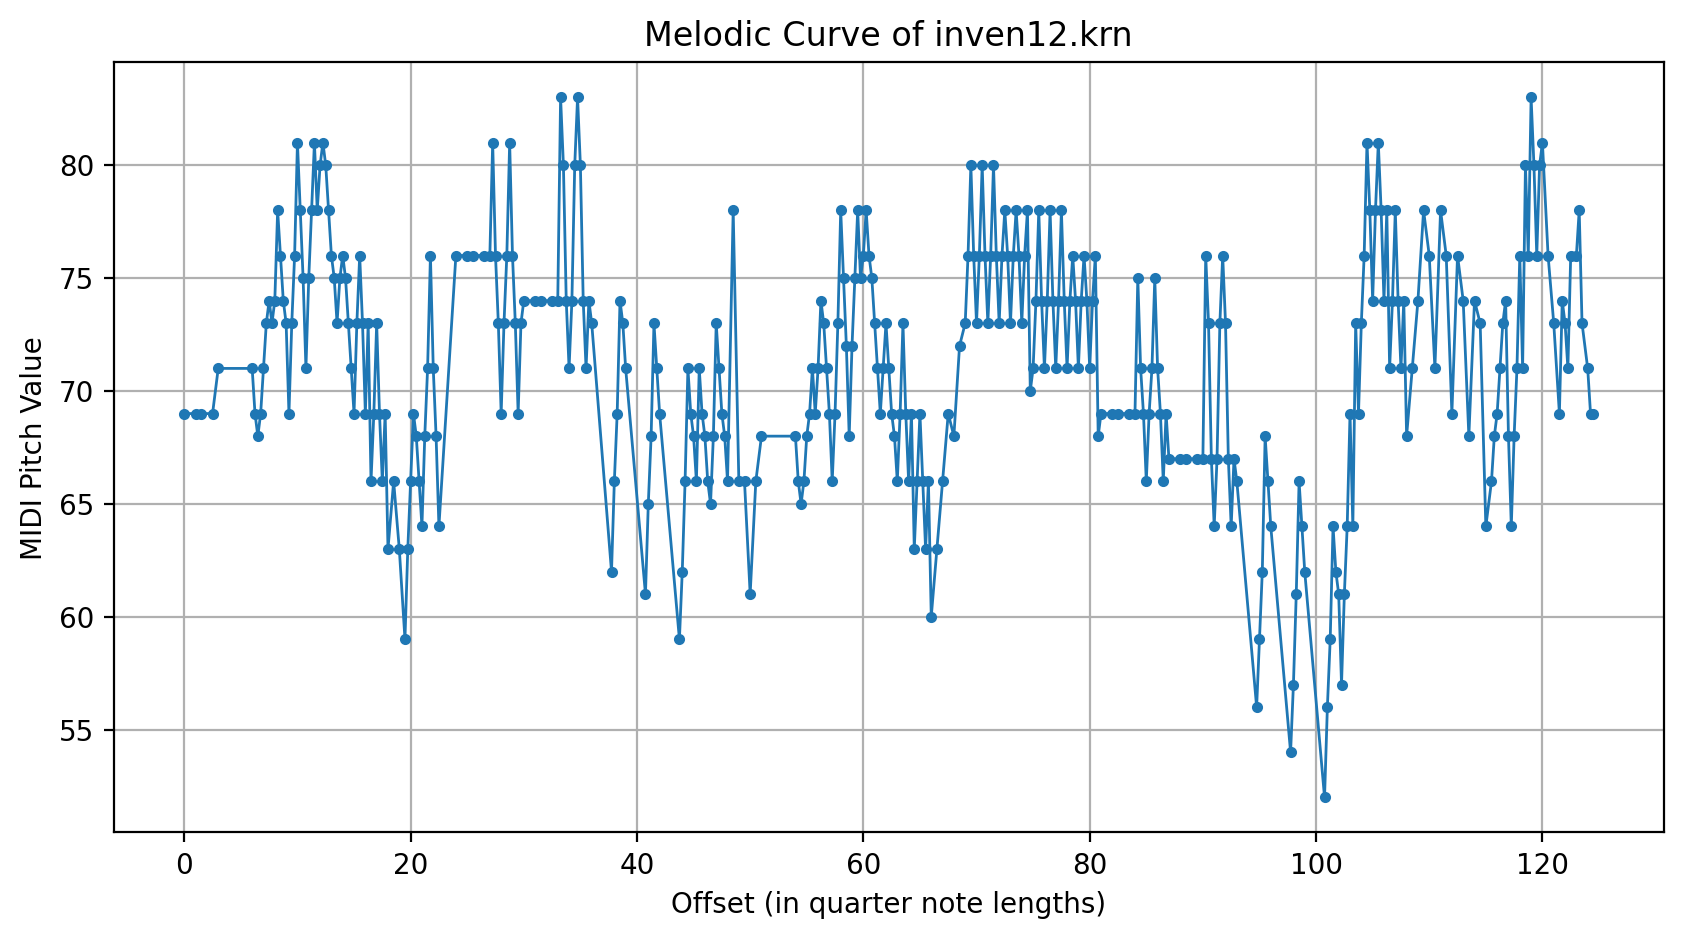

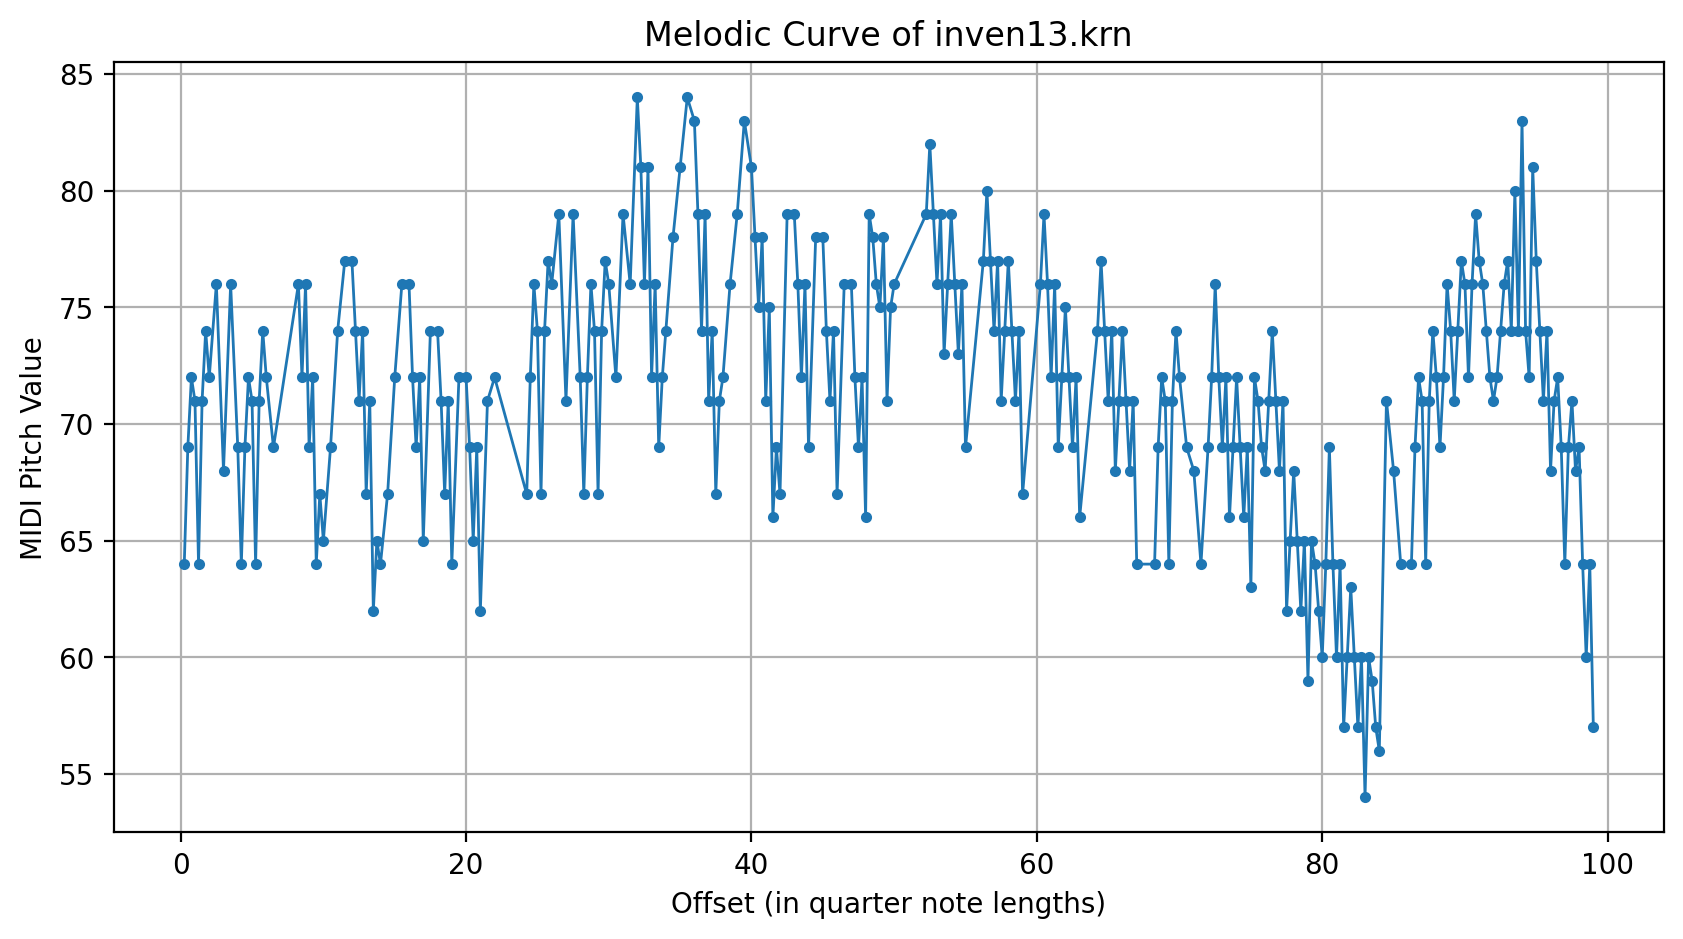

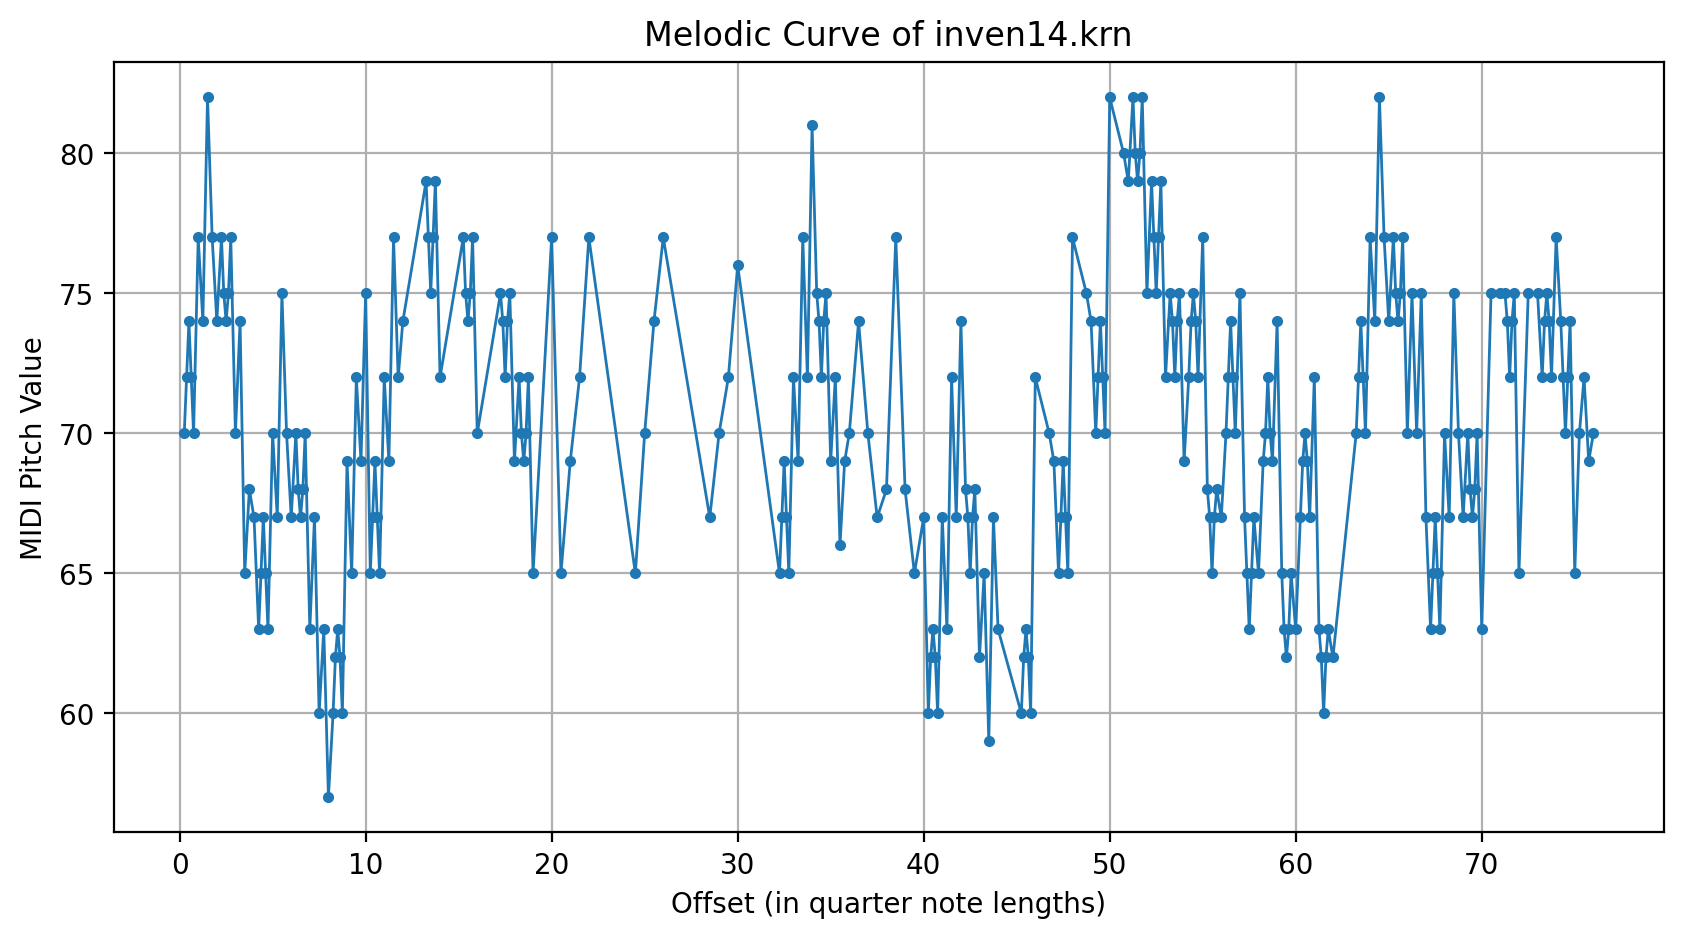

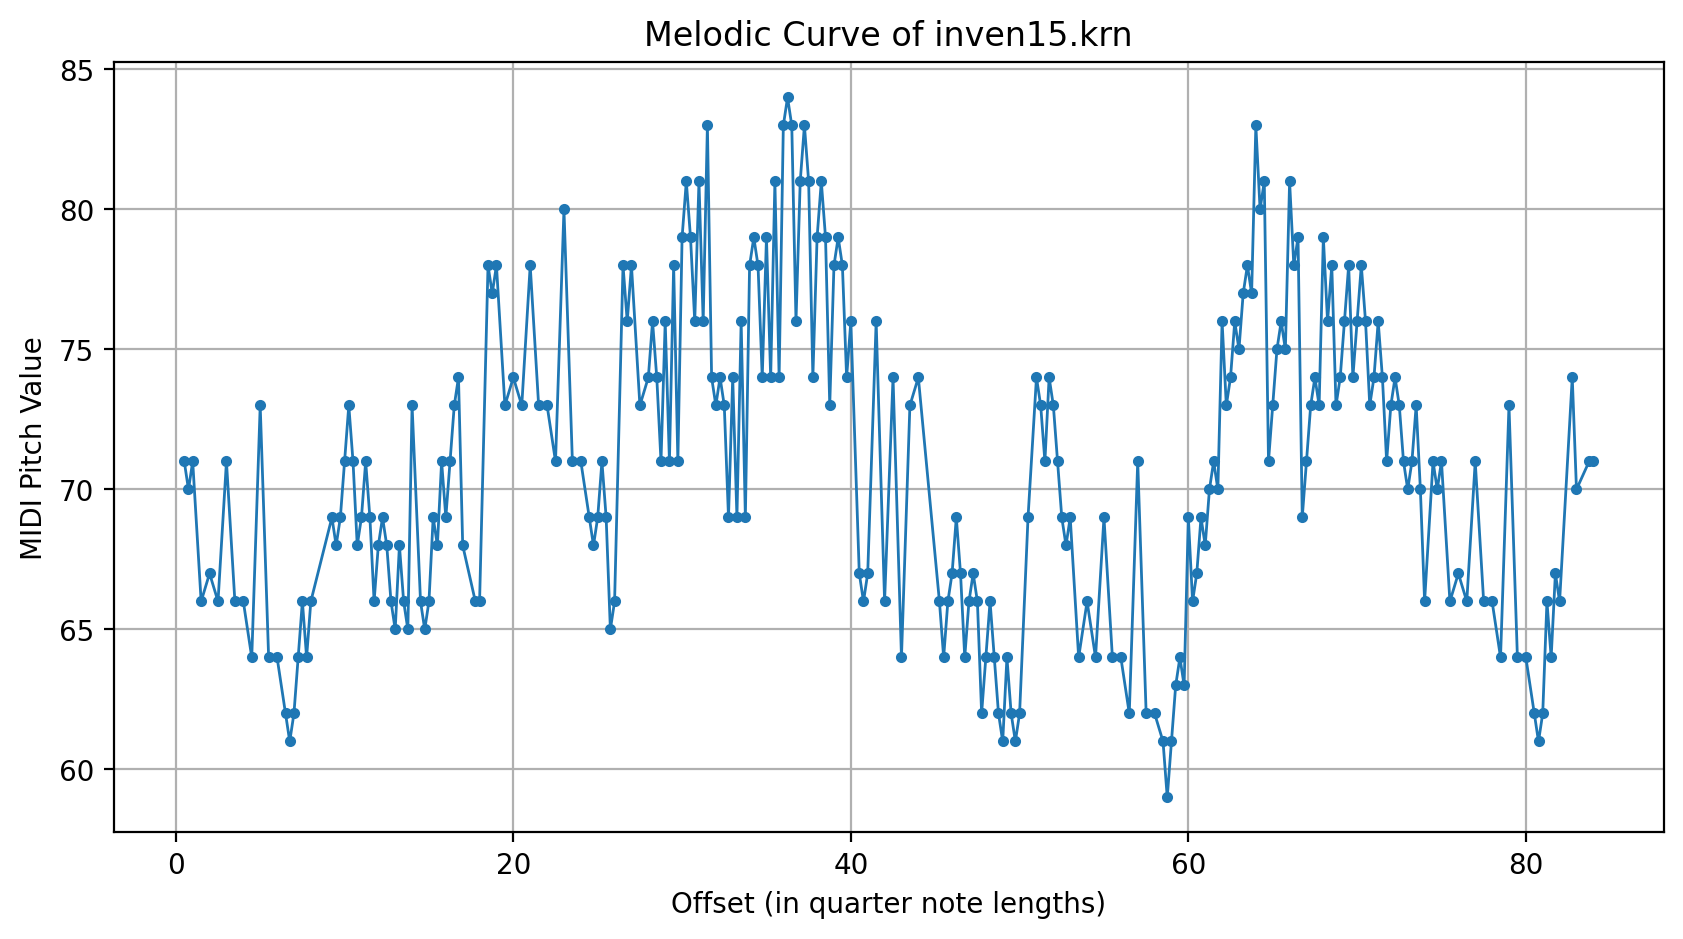

In [15]:
import matplotlib.pyplot as plt
from music21 import converter, chord, note

def plot_melodic_curve(filename):
    # Load the piece
    piece = converter.parse(filename)

    # Assume the melody is in the first part
    melody_part = piece.parts[0]
    notes_and_chords = melody_part.flat.notesAndRests  # This includes notes, chords, and rests

    pitch_data = []
    for nc in notes_and_chords:
        if isinstance(nc, note.Note):
            # It's a single note
            midi_value = nc.pitch.midi
            pitch_data.append((nc.offset, midi_value))
        elif isinstance(nc, chord.Chord):
            # Take the top note's pitch (highest pitch)
            top_note = nc.pitches[-1]
            midi_value = top_note.midi
            pitch_data.append((nc.offset, midi_value))

    if pitch_data:
        # Unzip the data into x (offsets) and y (pitches) components
        x, y = zip(*pitch_data)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.plot(x, y, 'o-', marker='o', markersize=3, linewidth=1)  # Line with dots
        plt.title(f"Melodic Curve of {filename}")
        plt.xlabel("Offset (in quarter note lengths)")
        plt.ylabel("MIDI Pitch Value")
        plt.grid(True)
        plt.show()

# List of filenames
filenames = [f"inven{str(i).zfill(2)}.krn" for i in range(1, 16)]

# Process each file
for filename in filenames:
    plot_melodic_curve(filename)
